# Lecture 7. Representation learning

## Previous lecture

- Support vector machine
- Dual formulation
- Kernel trick idea

## Today lecture

- What is representation learning?
- Why do we need it?
- What do we want to represent?
- Methods and state-of-the-art

## Resources

- The chapter 15 in Deep learning book by I. Goodfellow, Y. Bengio and A. Courville
- [ICML 2012 tutorial](http://www.iro.umontreal.ca/~bengioy/talks/icml2012-YB-tutorial.pdf) by Y. Bengio
- Manifold learning books

## Problem statement

- Represent data as objects in much lower dimensional space and preserve their inner properties
- Formally, build a map $g: \mathbb{R}^n \to \mathbb{R}^p$ such that $ p \ll n$ and relations between samples are preserved
- The optimization problem has to be tracktable
- We can relax requirements and do not get inverse map
- Manifold learning interpretation 

## Linear case

$$
\min_{U, V} \| X - UV\|_2
$$

- Again SVD, but here it is called PCA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.manifold as sklman
import sklearn.decomposition as skldecomp

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./")

Number of pics = 70000
3.0


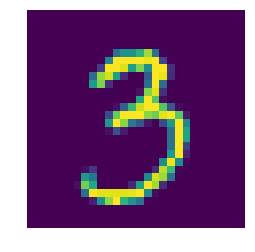

In [3]:
data = mnist["data"]
label = mnist["target"]
print("Number of pics = {}".format(data.shape[0]))
sel_idx = 20000
plt.imshow(data[sel_idx].reshape(28, 28))
plt.axis("off")
print(label[sel_idx])

In [15]:
idx_subset = np.random.randint(0, data.shape[0], (2500,))
X = data[idx_subset, :]
y = label[idx_subset]

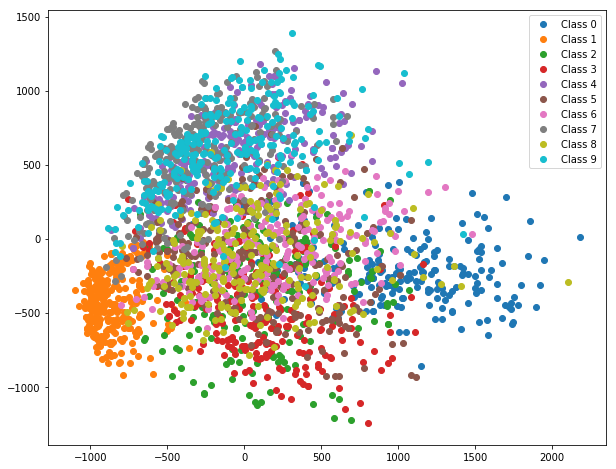

In [16]:
pca = skldecomp.PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_pca[y==cl, 0], X_pca[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")

## Nonlinear case

## Multidimensional scaling

$$
\min_{x_i, x_j \in \mathbb{R}^p} \sum_{i \neq j} (d_{ij} - \| x_i -  x_j\|_2)^2
$$

- Distances between new points have to be closer to the distances between original points

In [17]:
mds = sklman.MDS(n_components=2)
X_mds = mds.fit_transform(X)

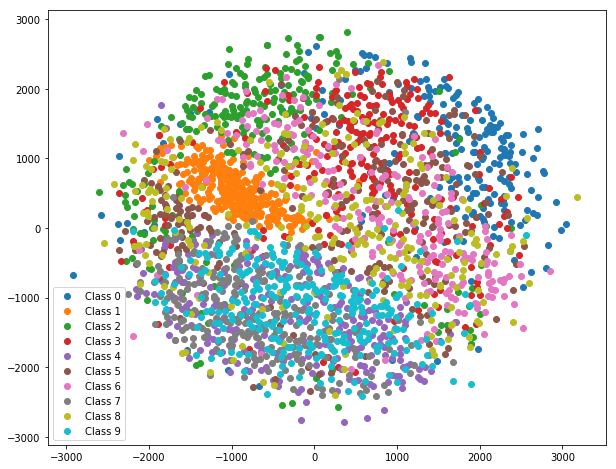

In [18]:
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_mds[y==cl, 0], X_mds[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")

## Isomap

- Use not euclidean but **geodesic** distances between points
- Nearest neighbour search
- Represent data as a graph and consider shortest path as geodesic
- Use MDS for new similarity matrix

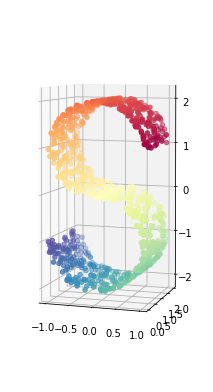

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as skldata

n_points = 1000
X, color = skldata.samples_generator.make_s_curve(n_points, random_state=0)
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

- Isomap has proved convergence guarantees
- Computed distances are closer to real geodesic distances
- Manifold can have holes, difficult to optimize!

In [19]:
isomap = sklman.Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

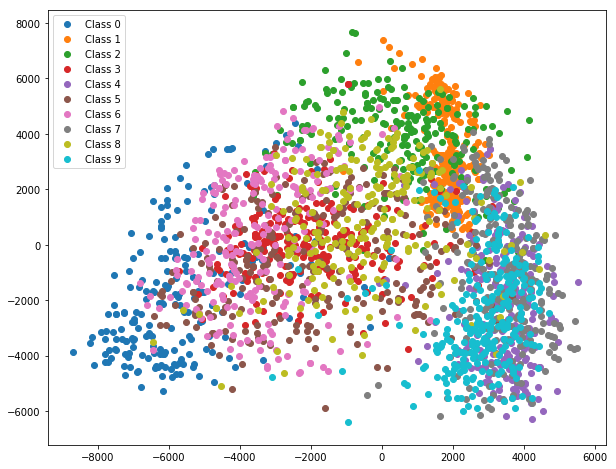

In [21]:
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_isomap[y==cl, 0], X_isomap[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")

## Locally linear embedding

- The chosen point can be approximated as linear combination of its neighbours 
- Construct matrix $W = [w_{ij}]$ such that
$$
\min_{W} \| x_j - \sum_{i \in N(j)} w_{ij}(x_i - x_j) \|_2, \quad \sum_{i \in N(j)} w_{ij} = 1
$$
- After that find matrix $Y$ which represents low dimensional data such that
$$
\min_Y \sum_i \| y_i - \sum_j w_{ij}y_j \|_2 
$$

In [22]:
lle = sklman.LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X)

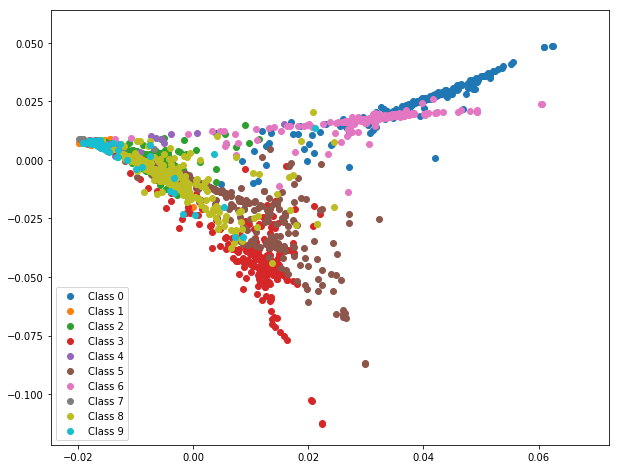

In [23]:
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_lle[y==cl, 0], X_lle[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")

## t-SNE

- Data is represented as probability distribution over distances between points
$$
p_{ij} = \frac{\exp(-\|x_i - x_j \|^2)}{\sum_{k \neq l} \exp(-\| x_k - x_l \|^2)}
$$
- Distributions of distances between high dimensional data and low dimansional data has to be closer
- Use KL divergence as a measure of distribution similarity
$$
KL(p || q) = \sum_i p_i \log \frac{p_i}{q_i} 
$$
- To minimize the KL divergence one uses gradient descent
- About performance issues see [here](https://distill.pub/2016/misread-tsne/)
- More details see [here](https://habrahabr.ru/post/267041/) and in the [original paper](./)

In [24]:
tsne = sklman.TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

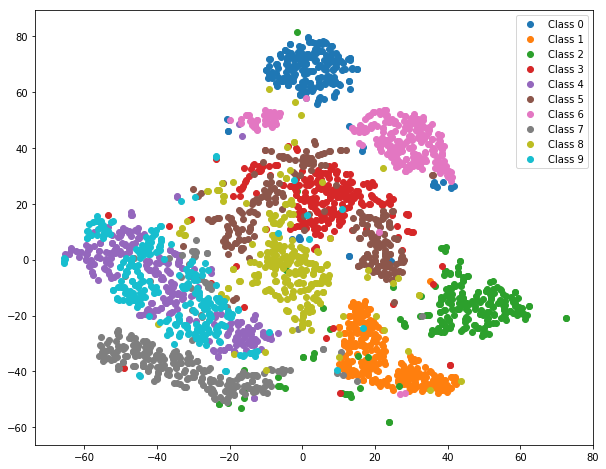

In [25]:
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_tsne[y==cl, 0], X_tsne[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")

## From word to vector

- The recent trend in machine translation and NLP is words embedding in linear spaces
- One of the first and famous method for that embedding is word2vec by [Mikolov et. al.](https://arxiv.org/abs/1301.3781)
- Some useful tutorials and examples: [here](https://habrahabr.ru/post/249215/), [here](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/) and [here](https://www.tensorflow.org/tutorials/word2vec)

## Word2Vec: [examples for Russian](https://github.com/nlpub/russe-evaluation/tree/master/russe/measures/word2vec)

In [1]:
import utils
w2v = utils.load_vectors("../../Development/containers/all.norm-sz100-w10-cb0-it1-min100.w2v")

In [16]:
new_concept = u"германия"
target_vec = w2v[u"лондон"] - w2v[u"англия"] + w2v[new_concept]

for w in w2v.similar_by_vector(vector=target_vec):
#     if new_concept.encode("utf-8") != w[0].encode("utf-8"):
        print w[0].encode("utf-8"), w[1]

берлин 0.909382581711
мюнхен 0.890512347221
лондон 0.866283893585
дюссельдорф 0.848258733749
франкфурт 0.841085195541
штутгарт 0.828388094902
цюрих 0.828234374523
брюссель 0.817357480526
прагу 0.815072596073
будапешт 0.812860012054


In [10]:
w2v.similarity(w1=u"mit", w2=u"мгу")

0.4004219794443919

In [15]:
for w in w2v.most_similar(positive=[u"математика"], negative=[u"физика"]):
    print w[0].encode("utf-8"), w[1]

латынь… 0.470961719751
каллиграфия 0.46953868866
арифметике 0.464765161276
чистописанию 0.431360572577
латынь 0.431303441525
правописанию 0.429223328829
каллиграфии 0.425783813
— латынь 0.425027728081
абаком 0.418344736099
греческий… 0.416742026806


## Summary

- Representation learning problem statement (general and particular)
- Methods for images: PCA, Isomap, MDS, LLE, t-SNE
- Methods for texts: Word2Vec